- **interdisiplinary schools**
- **Fatemeh Jafari**

# **PRACTICAL NEUROIMAGING-2**

## **what is VOXEL ?**

# **.header.get_zooms() in Nibabel**

> This function in Nibabel returns the size of each voxel along each dimension of the image.


> .get_zooms() returns a tuple with the size of a single voxel in each dimension.

- **For a 3D anatomical image (T1-weighted MRI):**

    - Voxel sizes (mm): (1.0, 1.0, 1.0)
    
        - This means each voxel is 1 mm × 1 mm × 1 mm in X, Y, Z directions.


- **For a 4D fMRI image:**

    - Voxel sizes (mm): (2.0, 2.0, 2.0, 1.5)

        - This means:

              - The spatial resolution is 2 mm × 2 mm × 2 mm.

              - The fourth value (1.5) represents the time resolution (TR = 1.5 seconds per scan).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib
from nilearn import plotting

In [4]:
img_t1 = nib.load(r'F:\neurotasks\interdisciplinary schools\2025-mentoring\python\sess5\sub-01\anat\sub-1_T1w_defaced.nii')
img_bold = nib.load(r'F:\neurotasks\interdisciplinary schools\2025-mentoring\python\sess5\sub-01\func\sub-1_task-objectviewing_run-01_bold.nii')
data_bold = img_bold.get_fdata()
t1_real = img_t1.get_fdata()


In [5]:
print(img_t1.header.get_zooms())  

(np.float32(1.2), np.float32(0.9375), np.float32(0.9375))


In [6]:
print(img_bold.header.get_zooms())  

(np.float32(3.5), np.float32(3.75), np.float32(3.75), np.float32(2.5))




---

# **different field of view**

### Field of view (FOV) = The total area covered by the scan.

In [7]:
print('\nfMRI data shape (the three spatial dimensions + time dimension) = ', img_bold.shape)
print('T1-weighted data shape (three spatial dimensions) = ', img_t1.shape)


fMRI data shape (the three spatial dimensions + time dimension) =  (40, 64, 64, 121)
T1-weighted data shape (three spatial dimensions) =  (124, 256, 256)


- Units: usually given in millimeters (mm) along each axis (X = left–right, Y = front–back, Z = top–bottom).

- Relation to image size:

     - **Voxel size × Number of voxels = FOV**

Example: if voxel size = 2×2×2 mm³ and image size =  64×64×36, then:  

     - FOV_x = 64×2=128mm

     - FOV_y = 64×2=128mm

     - FOV_z = 36×2=72mm



> A larger FOV covers more anatomy but might lower resolution (if voxel count is fixed).

> A smaller FOV gives higher detail in a smaller region.

> In MRI scanners: FOV is set before acquisition and depends on coil size, slice prescription, and patient positioning.

# **Why FOV Matters in Neuroimaging**

> Coverage → Make sure the FOV covers the anatomy of interest (whole brain vs. partial brain vs. spinal cord).

> Aliasing artifacts → If FOV is too small, anatomy outside the FOV gets wrapped back into the image (wrap-around artifact).

> Resolution trade-off → For a fixed matrix size, increasing FOV means larger voxels and lower resolution.

# **FOV in Functional vs. Structural Imaging**

> Structural MRI (T1, T2, etc.) → Typically large FOV (~240 mm) to cover whole brain in high resolution.

> fMRI (BOLD) → Often smaller FOV, targeted to brain regions of interest, to reduce scan time and improve temporal resolution.

In [8]:
data_bold = img_bold.get_fdata()
print(data_bold.shape)
print(data_bold.dtype)  # Output: float64 (default data type used by NiBabel)


(40, 64, 64, 121)
float64


In [9]:
data_t1=img_t1.get_fdata()
print(data_t1.shape)
print(data_t1.dtype) 


(124, 256, 256)
float64


In [10]:
data_bold_t14 = data_bold[:, :, :, 14]
print(data_bold_t14.shape[-1])

64


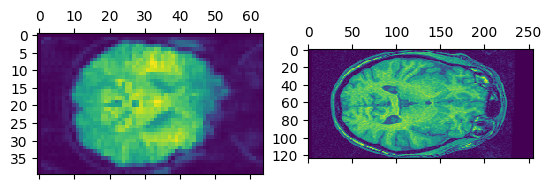

In [11]:

fig, ax = plt.subplots(1, 2)
ax[0].matshow(data_bold_t14[:, :, data_bold_t14.shape[-1]//2])
ax[1].matshow(data_t1[:, :, data_t1.shape[-1]//2])


---

## **Why FOV mismatch happens**

-  It usually comes from differences in:

     - Acquisition sequences (e.g., T1 structural vs fMRI)

     - Cropping during preprocessing

     - Different voxel sizes or matrix sizes

     - Partial brain coverage in functional scans

         - Example in neuroimaging:

             - T1-weighted anatomical MRI: covers the entire head (large FOV)

             - fMRI: often covers just the brain or even part of it (smaller FOV)
- **Problems caused by FOV mismatch**


     - **Registration errors:** The alignment algorithm may fail because one image has parts of anatomy missing or extended.
      
     - **Visualization issues:** When overlaying images (e.g., activation map over T1), some areas might not line up or might be blank.

     - **Resampling artifacts:** If you resample one image to match the other's space, you may introduce interpolation errors or distortions.
- **Example — T1 vs fMRI**

     - T1 structural scan:

         - 256 × 256 × 160 voxels

         - 1 × 1 × 1 mm voxel size

         - FOV: 256 × 256 × 160 mm → covers whole head

     - fMRI scan:

         - 64 × 64 × 40 voxels

         - 3 × 3 × 3 mm voxel size

         - FOV: 192 × 192 × 120 mm → smaller coverage

     - **Mismatch:**

         - Physical coverage different

         - Orientation might still match, but edges won't overlap completely.
- **How to fix FOV mismatch**

> Resample one image to match the FOV of the other 

     > (e.g., using from nibabel.processing import resample_from_to).

     > Crop or pad images so they have same dimensions and voxel sizes.

     > Use reference images during registration (e.g., use T1 as reference and warp fMRI to it).

     > Check visually after preprocessing to confirm coverage.

---

## **resolution mismatch**

In neuroimaging, resolution mismatch happens when two datasets you want to compare or combine (e.g., fMRI and T1-weighted images) have different voxel sizes, matrix dimensions, and sometimes FOVs.

Since each voxel is a 3D chunk of the brain, having different voxel sizes means the images are “sampled” at different levels of detail — like a low-resolution vs high-resolution photo.


- **Why It Happens**

     - T1-weighted anatomical MRI

         - High resolution: typical voxel size ~ 1×1×1 mm³

         - Purpose: capture fine anatomical details (sulci, gyri, cortical thickness).

         - Field of view (FOV) covers the entire head with uniform sampling.

     - fMRI (BOLD)

         - Lower resolution: typical voxel size ~ 2–4 mm³ (often anisotropic, e.g., 3×3×4 mm³).

         - Purpose: capture rapid brain activity over time, so speed > detail.

         - Larger voxels mean faster acquisition but less spatial detail.
- **Resolving Resolution Mismatch**

> ## **The solution is resampling — changing one dataset’s grid to match the other’s.**



---

## **RESAMPLING**

In [12]:
from nibabel.processing import resample_from_to

img_bold = nib.load(r"F:\neurotasks\interdisciplinary schools\2025-mentoring\python\sess5\sub-01\func\sub-1_task-objectviewing_run-01_bold.nii")
file_path_t1 = nib.load(r"F:\neurotasks\interdisciplinary schools\2025-mentoring\python\sess5\sub-01\anat\sub-1_T1w_defaced.nii")
data_bold = img_bold.get_fdata()
data_t1 = file_path_t1.get_fdata()

img_t1_resampled = resample_from_to(img_t1, (img_bold.shape[:3], img_bold.affine))
data_t1_resampled = img_t1_resampled.get_fdata()

In [16]:
print(file_path_t1.shape)


(124, 256, 256)


In [17]:
print(img_bold.shape)


(40, 64, 64, 121)


In [18]:
print(img_t1_resampled.shape)


(40, 64, 64)


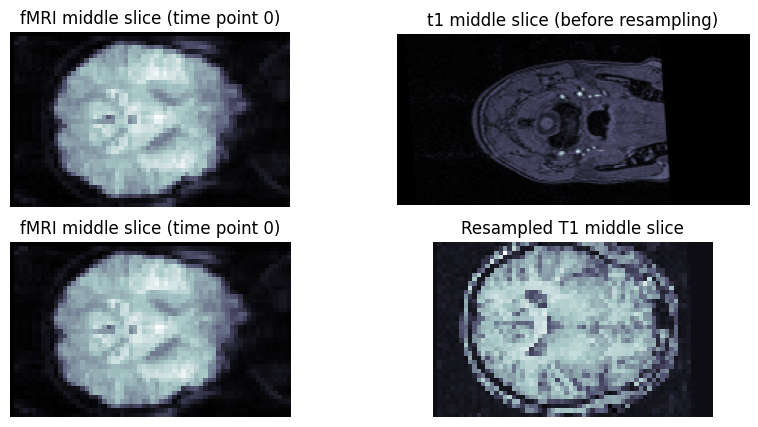

In [29]:
import matplotlib.pyplot as plt

bold_mid = data_bold[:, :, img_bold.shape[2] // 2, 0]

t1_mid = data_t1[:, :, img_bold.shape[2] // 2]

t1_mid_resampled = data_t1_resampled[:, :, img_bold.shape[2] // 2]

fig, ax = plt.subplots(2, 2, figsize=(10, 5))

ax[0,0].imshow(bold_mid, cmap='bone')
ax[0,0].set_title('fMRI middle slice (time point 0)')
ax[0,0].axis('off')

ax[0,1].imshow(t1_mid, cmap='bone')
ax[0,1].set_title('t1 middle slice (before resampling)')
ax[0,1].axis('off')

ax[1,0].imshow(bold_mid, cmap='bone')
ax[1,0].set_title('fMRI middle slice (time point 0)')
ax[1,0].axis('off')

ax[1,1].imshow(t1_mid_resampled, cmap='bone')
ax[1,1].set_title('Resampled T1 middle slice')
ax[1,1].axis('off')

plt.show()

C:\Users\fjafa\AppData\Local\Temp\ipykernel_15500\461437974.py:18: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  plotting.plot_anat(mean_img(img_bold))
C:\Users\fjafa\AppData\Local\Temp\ipykernel_15500\461437974.py:19: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  plotting.plot_stat_map(mean_img(img_bold),bg_img=img_t1_resampled, alpha = 0.6)


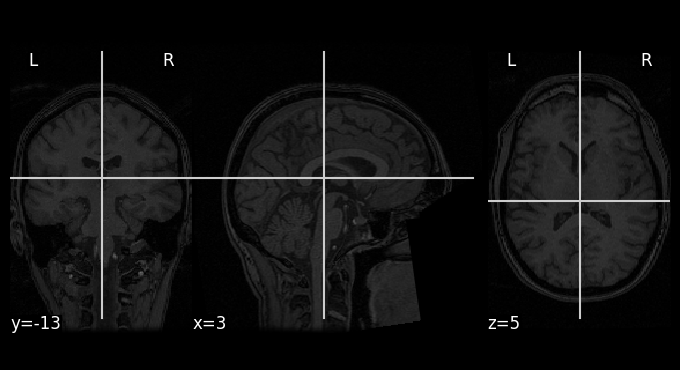

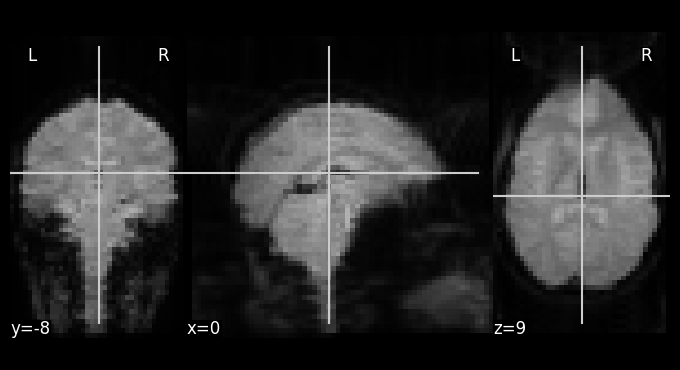

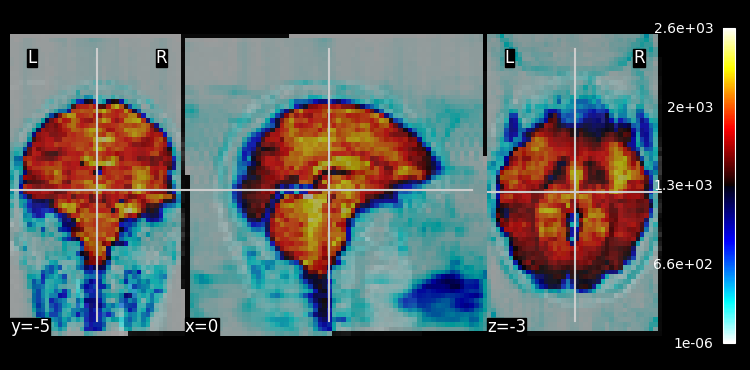

In [34]:
##compare the results (when you should check if the T1 and fMRI data alighned well or not)
from nilearn import plotting
import nibabel as nib
from nilearn.image import mean_img
from nibabel.processing import resample_from_to

img_bold = nib.load(r"F:\neurotasks\interdisciplinary schools\2025-mentoring\python\sess5\sub-01\func\sub-1_task-objectviewing_run-01_bold.nii")
file_path_t1 = nib.load(r"F:\neurotasks\interdisciplinary schools\2025-mentoring\python\sess5\sub-01\anat\sub-1_T1w_defaced.nii")
data_bold = img_bold.get_fdata()
data_t1 = file_path_t1.get_fdata()

img_t1_resampled = resample_from_to(img_t1, (img_bold.shape[:3], img_bold.affine))
data_t1_resampled = img_t1_resampled.get_fdata()



plotting.plot_anat(file_path_t1)
plotting.plot_anat(mean_img(img_bold))
plotting.plot_stat_map(mean_img(img_bold),bg_img=img_t1_resampled, alpha = 0.6)
plotting.show()
